In [5]:
import onnx
import numpy as np
import tvm
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tvm import te
from tvm import relay, transform
from tvm.contrib import graph_executor as runtime
import requests
from bs4 import BeautifulSoup
from PIL import Image
import io
from pathlib import Path
import logging
logging.basicConfig(level=logging.INFO)

In [6]:
model_path = Path.cwd().parent / 'models' / 'insightface_attributes' / 'genderage.onnx'
model_path.exists()

True

In [7]:
onnx_model = onnx.load(str(model_path))

In [8]:
onnx_model.graph.input

[name: "data"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_param: "None"
      }
      dim {
        dim_value: 3
      }
      dim {
        dim_value: 96
      }
      dim {
        dim_value: 96
      }
    }
  }
}
]

In [9]:
target = "llvm"

input_name = "data"
input_dtype = "float32"
input_shape = (1, 3, 96, 96)
shape_dict = {input_name: input_shape}
mod, params = relay.frontend.from_onnx(onnx_model, shape_dict, freeze_params=True)

target = "llvm"
with transform.PassContext(opt_level=3):
    lib = relay.build(mod, target, params=params)
    lib.export_library(str(model_path.with_suffix(".so")))

INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for negative based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:co

INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for negative based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:comp

INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for negative based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:comp

INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for squeeze based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for squeeze based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for squeeze based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for squeeze based on highes

INFO:compile_engine:Using depthwise_conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using depthwise_conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using depthwise_conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using depthwise_conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using depthwise_conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using dense_pack.x86 for nn.dense based on highest priority 

INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INF

In [10]:
# Create a runtime executor module
module = runtime.GraphModule(lib["default"](tvm.cpu()))

In [11]:
onnx_model.graph.output

[name: "fc1"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 3
      }
    }
  }
}
]

In [19]:
def get_image():
    r = requests.get('https://thispersondoesnotexist.com/image')
    image = np.asarray(Image.open(io.BytesIO(r.content)))
    return image

[ 0.23310205 -0.23307231  0.35310996]


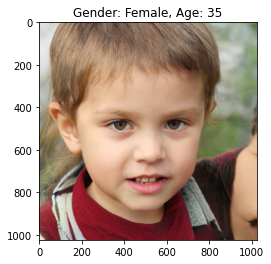

In [22]:
original_image = get_image()

input_mean = 127.5
input_std = 128.0
input_size = (96, 96)
image_data = cv2.dnn.blobFromImage(original_image, 1.0/input_std, input_size, (input_mean, input_mean, input_mean), swapRB=False)

#image = cv2.resize(original_image, (96, 96), cv2.INTER_LINEAR_EXACT)
#image = image.astype(np.float32)
#image = (image - 127.5) / 128.0
#image_data = np.transpose(image, (2, 0, 1))
#image_data = image_data[np.newaxis, :]

module.set_input("data", tvm.nd.array(image_data))
module.run()
pred = np.squeeze(module.get_output(0).numpy())
age = int(np.round(pred[2]*100))
gender = "Female" if np.argmax(pred[:2]) == 0 else "Male"
print(pred)
plt.imshow(original_image)
plt.title(f"Gender: {gender}, Age: {age}")
plt.show()